## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay



# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [31]:
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/Mary080102/GridSearch-KNN/main/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [32]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Based on the results of .info(),we can infer the following:

There are no missing values in the dataset.

The dataset includes both integer and floating-point numbers.

**<font color='teal'> Apply the describe function to the data.</font>**

In [33]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 Columns such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI have minimum values of zero, which are not realistic and likely represent missing values.
 
 There is significant variability in column Insulin that indicated by its large standard deviations.

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [34]:
columns_with_zero= ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[columns_with_zero]=diabetes_data[columns_with_zero].replace(0,np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

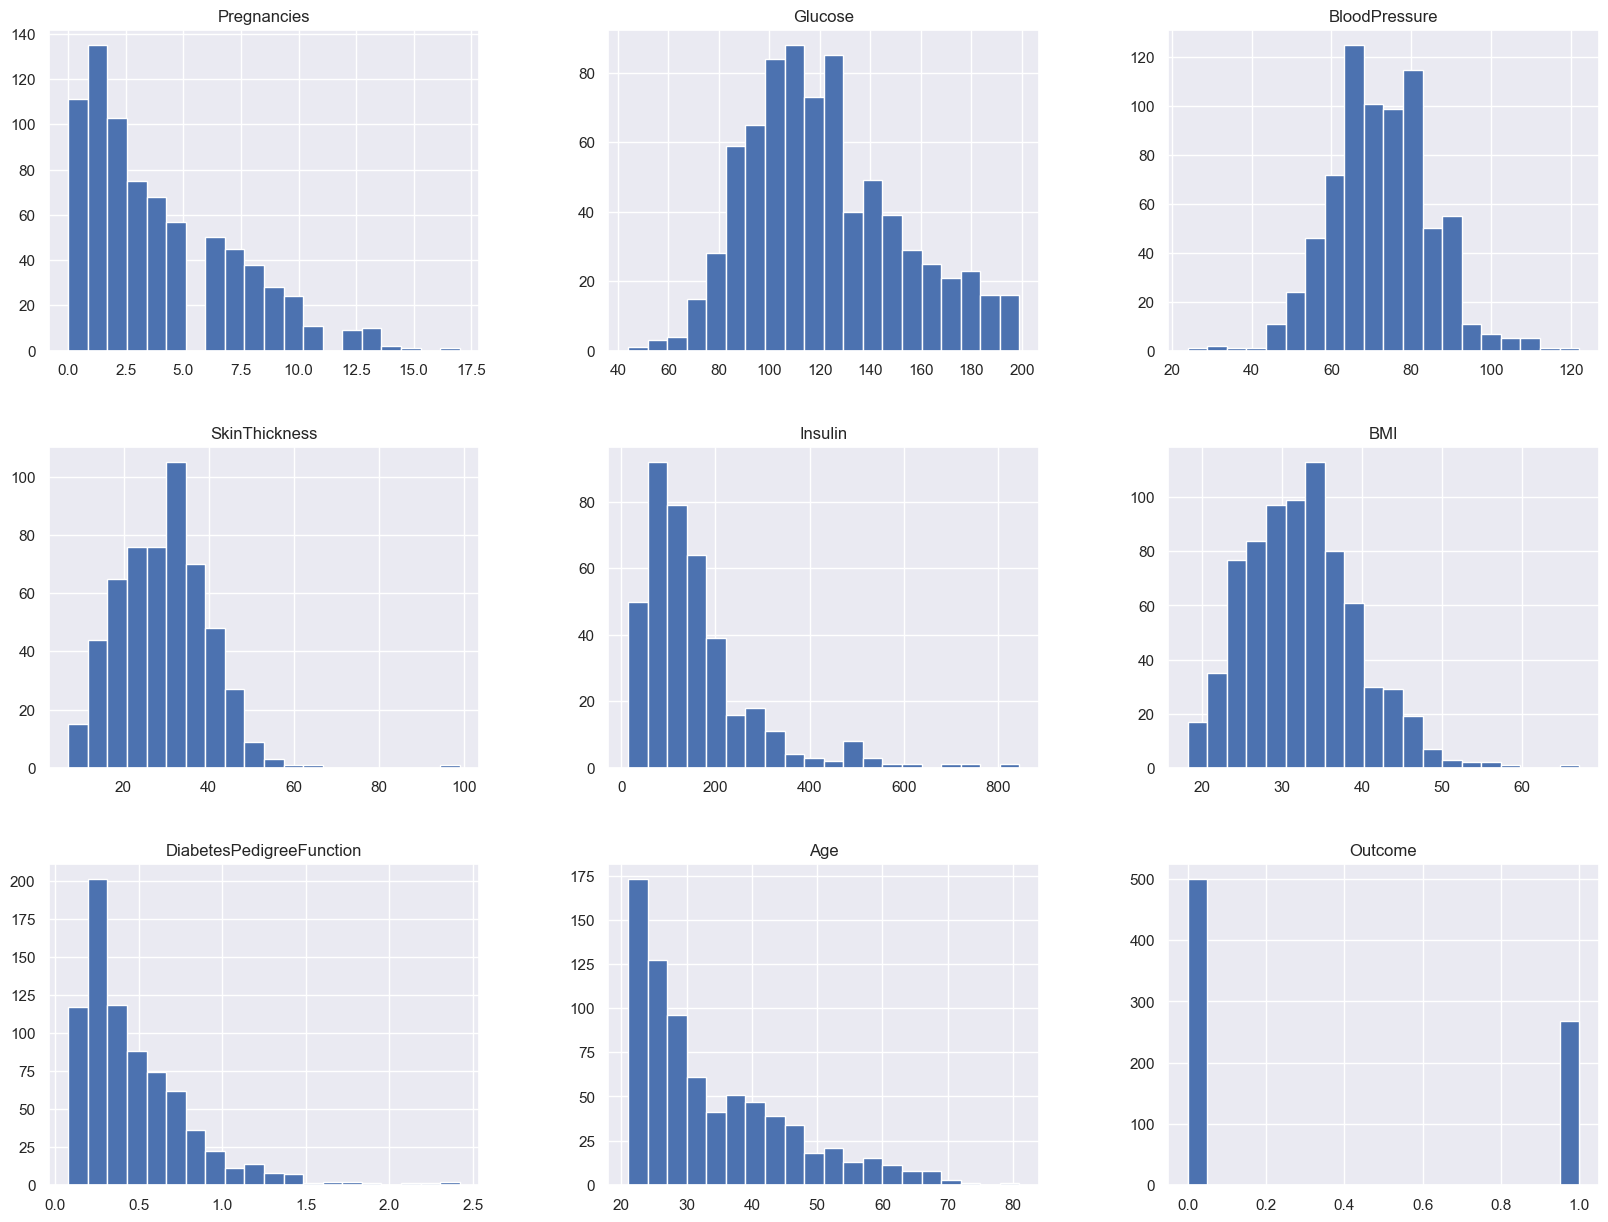

In [35]:
diabetes_data.hist(bins=20,figsize=(20,15))
plt.show()

#### Replace the zeros with mean and median values.

In [36]:
diabetes_data['Glucose']= diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean())
diabetes_data['BloodPressure']= diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean())
diabetes_data['SkinThickness']= diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median())
diabetes_data['Insulin']= diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median())
diabetes_data['BMI']= diabetes_data['BMI'].fillna(diabetes_data['BMI'].median())

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

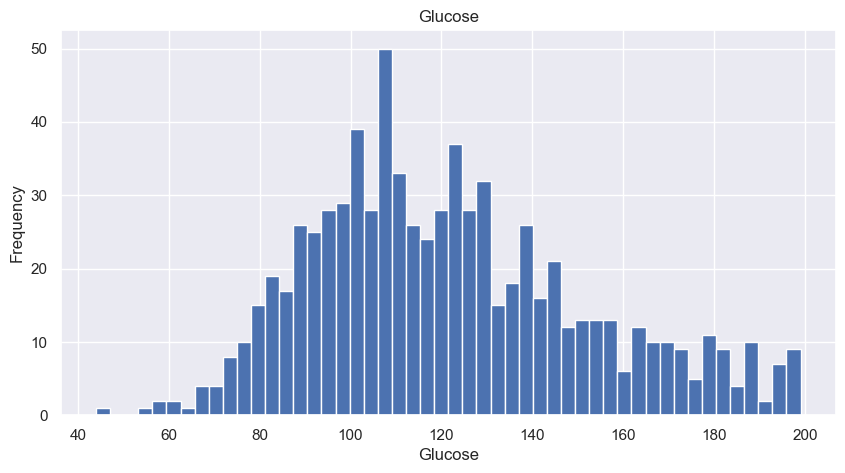

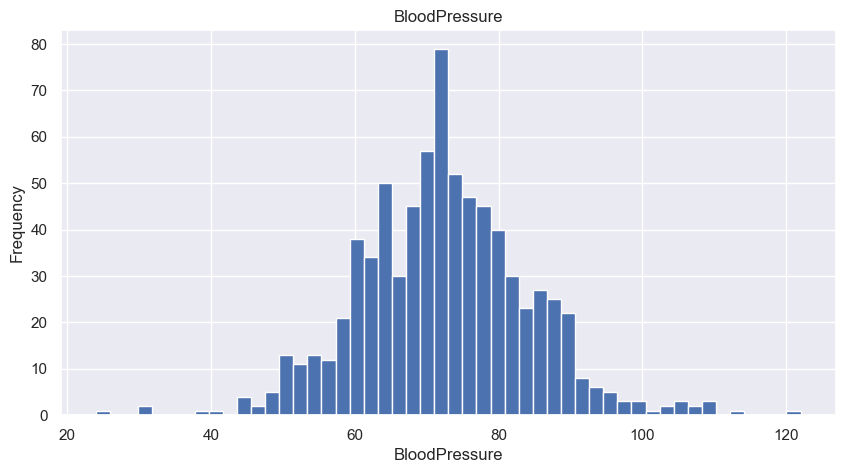

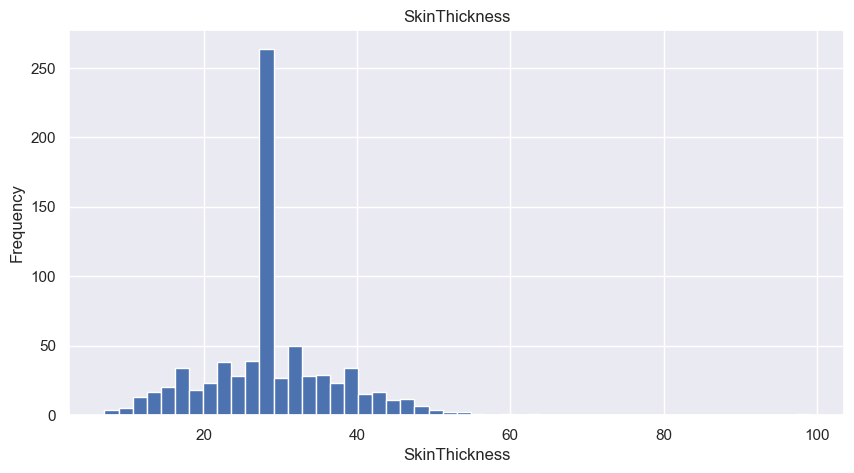

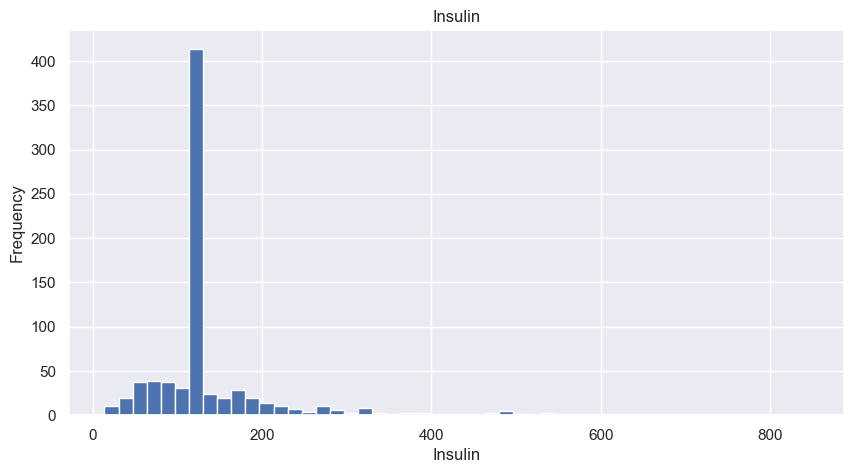

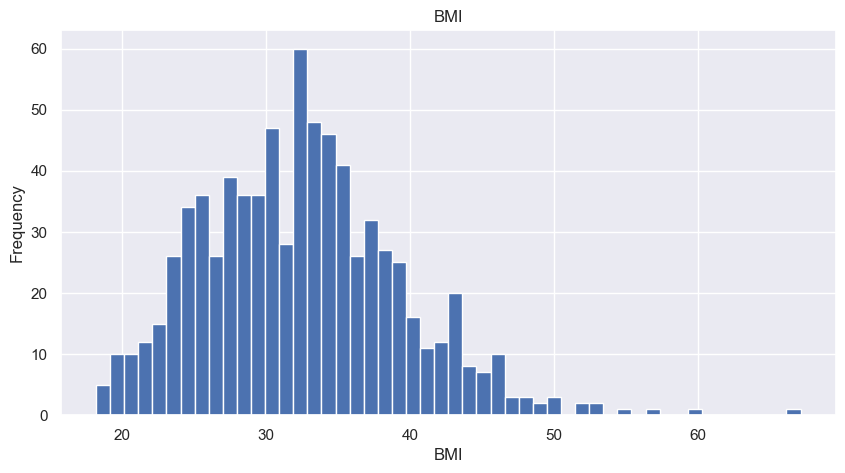

In [37]:
for col in columns_with_zero:
    plt.figure(figsize=(10,5))
    diabetes_data[col].hist(bins=50)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    

#### Plot the correlation matrix heatmap

Correlation between various features


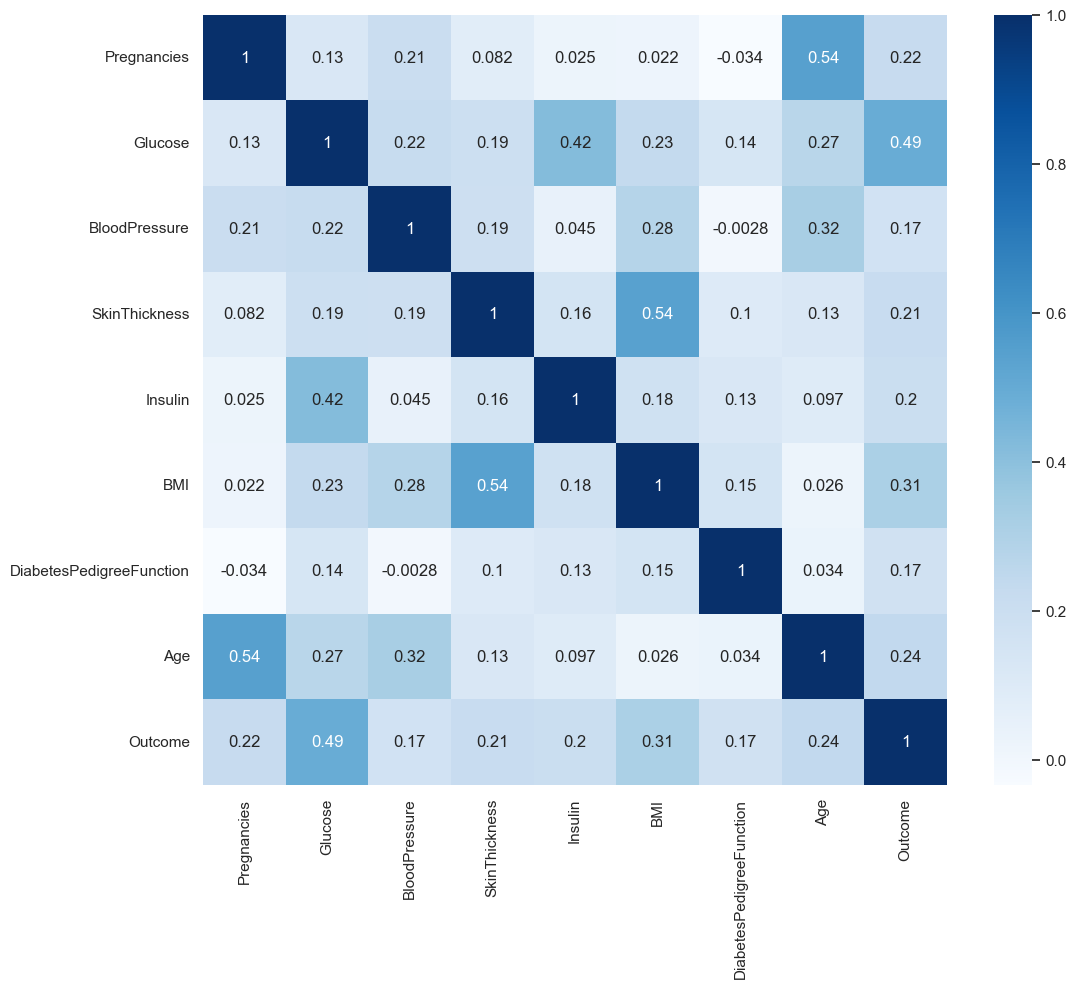

In [38]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

Based on the above heatmap some features have moderate correlation :

**Moderate correlations**

Glucose and Outcome: 0.49

Glucose and insulin:0.42

Skin Thickness and BMI:0.54

Pregnancies and Age=0.54

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [39]:
y= diabetes_data['Outcome']
X=diabetes_data.drop('Outcome',axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [40]:
X_train,X_test,y_train,y_test= train_test_split (X,y,random_state=42,test_size=0.3)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [41]:
# Create a StandardScaler instance
scaler= StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled= scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print the shapes to confirm
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (537, 8)
X_test_scaled shape: (231, 8)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [42]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [43]:
k_range= range(1,10)

for k,train_scor,test_scor in zip(k_range,train_scores,test_scores):
    print(f"K:{k} Train Score={train_scor:.4f} Test score={test_scor:.4f}")
    

K:1 Train Score=1.0000 Test score=0.6840
K:2 Train Score=0.8454 Test score=0.7056
K:3 Train Score=0.8399 Test score=0.6926
K:4 Train Score=0.8212 Test score=0.7100
K:5 Train Score=0.8212 Test score=0.6710
K:6 Train Score=0.8212 Test score=0.7013
K:7 Train Score=0.8119 Test score=0.6970
K:8 Train Score=0.8045 Test score=0.6970
K:9 Train Score=0.7952 Test score=0.7100


Based on the above results:

**Training Scores:**

The training score for k=1 is 1.0000, which means the classifier perfectly fits the training data. This is often a sign of overfitting, where the model memorizes the training data but may not generalize well to new, unseen data.
As k increases, the training scores generally decrease. This is expected because a larger k value means the model considers more neighbors, leading to a smoother decision boundary that might not fit the training data as closely.

**Testing Scores:**

The testing scores show the performance of the classifier on the test data, which gives an indication of how well the model generalizes to new data.
The highest test score in the output is k=4 and k=9, both with a test score of 0.7100.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [45]:
max_train_score=max(train_scores)
best_k_train= k_range[train_scores.index(max_train_score)]
print(f"The number of neighbors that resulted in the maximum score in the training dataset is k={best_k_train} with a score of {max_train_score:.4f}")

The number of neighbors that resulted in the maximum score in the training dataset is k=1 with a score of 1.0000


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [47]:
max_test_score= max(test_scores)
best_k_test= k_range[test_scores.index(max_test_score)]
print(f"The number of neighbors that resulted in the max score in the testing dataset is k={best_k_test}with a score of{max_test_score:.4f}")

The number of neighbors that resulted in the max score in the testing dataset is k=4with a score of0.7100


Plot the train and test model performance by number of neighbors.

/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

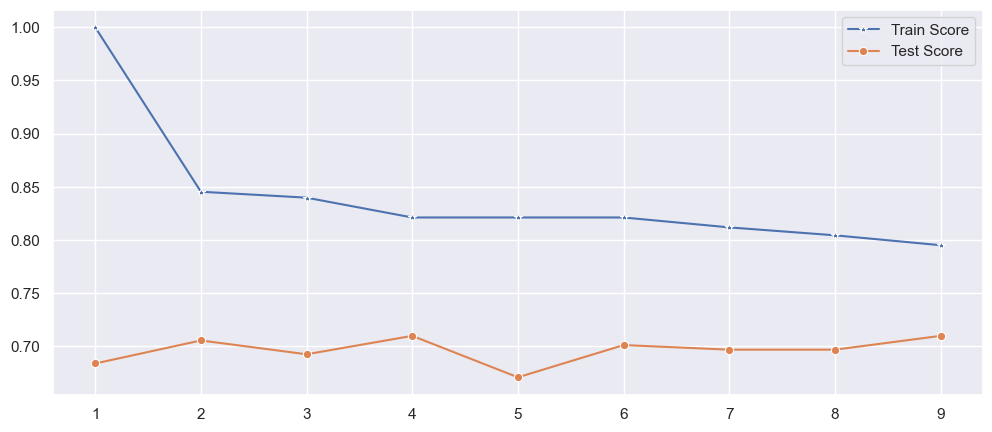

In [50]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

A higher train score for the same test score can indicate better model performance as it suggests that the model is fitting the training data reasonably well without overfitting too much. Thus, a k=4 with a train score of 0.82 and test score of 0.71 might be preferable over k=9 with the same test score but a lower train score(0.79).

In [55]:
# Fit the KNN classifier with k=4
knn=KNeighborsClassifier(4)
knn.fit(X_train_scaled,y_train)

# Predict the outcomes for the scaled test data
y_pred= knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy=accuracy_score(y_test,y_pred)

print(f"Accuracy of KNN classifier with k=4: {accuracy:.4f}")

Accuracy of KNN classifier with k=4: 0.6926


In [57]:
from sklearn.metrics import confusion_matrix
#y_pred = knn.predict(X_test)
#pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [68]:
conf_matrix= confusion_matrix(y_test,y_pred)

print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[  0 151]
 [  0  80]]


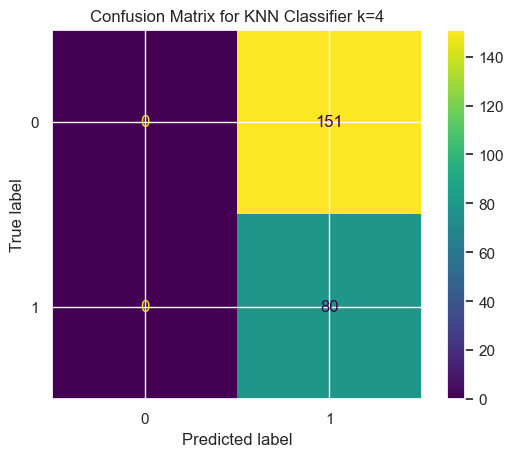

In [70]:
# Display the confusion matrix as a heatmap
cm_display= ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot(cmap='viridis')
plt.title("Confusion Matrix for KNN Classifier k=4")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [72]:
# True labels
y_true= [0]*151 + [1]*80

# Predicted labels
y_pred = [1]*151 + [1]*80

# Print the classification report
print(classification_report(y_true,y_pred,target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       151
     Class 1       0.35      1.00      0.51        80

    accuracy                           0.35       231
   macro avg       0.17      0.50      0.26       231
weighted avg       0.12      0.35      0.18       231



/Users/marzieh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marzieh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marzieh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Class 0** 

Precision: 0.00, meaning the model did not correctly identify any instances of Class 0.

Recall: 0.00, meaning the model failed to find any of the actual Class 0 instances.

F1-Score: 0.00, a combination of precision and recall indicating poor performance.


**Class 1** 

Precision: 0.35, meaning that only 35% of the instances predicted as Class 1 are actually Class 1.

Recall: 1.00, meaning the model found all instances of Class 1.

F1-Score: 0.51, a combination of precision and recall.

**Overall Accuracy:** 0.35, meaning the model correctly predicted 35% of the instances.

The model appears to have a significant imbalance issue or other factors leading to poor performance for class 0. We need to revisit our model, check for data imbalance, or consider other techniques like adjusting the decision threshold or using a different algorithm.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [74]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
#Set up the parameter grid
param_grid={'n_estimators': np.arange(10,200,10)}

#Create the Random Forest classifier
rf=RandomForestClassifier()

#Perform the grid search
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X_train_scaled, y_train)

#Print the best score and best parameters
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7709068881966078
Best Parameters: {'n_estimators': 120}
